CUNY MSDS DATA620 - Web Analytics

Week 4 - High Frequency Words
Team1 : Ramnivas Singh, Deepak Sharma, Tage Singh


Project Overview:

1) Choose a corpus of interest.
2) How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).
3) Taking the most common words, how many unique words represent half of the total words in the corpus?
4) Identify the 200 highest frequency words in this corpus.
5) Create a graph that shows the relative frequency of these 200 words.
6) Does the observed relative frequency of these words follow Zipf’s law? Explain.
7) In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”


Choosing a corpus of interest.
Selected one of the corpus from the freely available Gutenburg library that can be downloaded from the NLTK package.corpus selected is Persuasion written by Jane Austen.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Deepak\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [2]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
austen_pers = nltk.Text(nltk.corpus.gutenberg.words('austen-persuasion.txt'))

2. Getting Total Unique Words.
How many total unique words are in the corpus? 

In [4]:
#get the length of the corpus to get all words count
allWordCount=len(austen_pers)
allWordCount

98171

But this is the count of every word even duplicates. we need to remove these duplicates -so we used set function.  

In [5]:
print(*sorted(set(austen_pers))[:100], sep = "   ")

!   !"   !'   !--   "   &   '   '.   (   )   ),   ).   );   ,   ,"   ,"--   ,"--"   ,'   ,)   ,)--   ,--   ,--`   -   --   --!   --"   --(   ---   ---.   --;   .   ."   .'   .'"   .)   .,   .--   .--,   .--,"   1   10   11   12   13   14   15   16   17   1760   1784   1785   1787   1789   1791   18   1800   1803   1806   1810   1814   1818   19   1st   2   20   21   22   23   24   29th   3   4   5   6   7   8   9   :   :"   :--   :--"   ;   ;"   ;'   ;)   ;--   ;--"   ?   ?"   ?'   ?'"   ?)   ?),   A   About   Abydos   Accordingly   Admiral   Admiralty   After


Observer that first almost 100 words are not even words! 
Looking at the sample of words above we can see that it includes punctuation and numbers as well as words. Python  sees capital letters as distinct from lowercase letters, so we need to convert all words to lowercase and remove punctuation and numbers to get only the unique words.

We need to modify some code from the textbook to exclude punctuation and numbers and remove capitalization using python functions.

In [6]:
# create list of all words including duplicates, but excluding punctuation, numbers and capitalization- here we talking only alpha words and converting to lower case
austen_persWithNP = [word.lower() for word in austen_pers if word.isalpha()]

# print
print(*austen_persWithNP[:100], sep = "   ")

persuasion   by   jane   austen   chapter   sir   walter   elliot   of   kellynch   hall   in   somersetshire   was   a   man   who   for   his   own   amusement   never   took   up   any   book   but   the   baronetage   there   he   found   occupation   for   an   idle   hour   and   consolation   in   a   distressed   one   there   his   faculties   were   roused   into   admiration   and   respect   by   contemplating   the   limited   remnant   of   the   earliest   patents   there   any   unwelcome   sensations   arising   from   domestic   affairs   changed   naturally   into   pity   and   contempt   as   he   turned   over   the   almost   endless   creations   of   the   last   century   and   there   if   every   other   leaf   were   powerless   he   could   read   his   own


In [7]:
# take the length of the set of those words to find the number of unique words
len(set(austen_persWithNP))

5739

By taking the length of the set of words after we removed punctuation, numbers and capitalization we find that we have 5,739 'unique' words in our corpus.

3. How many unique words represent half of all words.
Taking the most common words, how many unique words represent half of the total words in the corpus?
We can create a frequency distribution of the list of all words excluding numbers, punctuation and capitalization to get a count for each unique word in the corpus.

In [8]:
fdist = nltk.FreqDist(austen_persWithNP)
fdist

FreqDist({'the': 3329, 'to': 2808, 'and': 2801, 'of': 2570, 'a': 1595, 'in': 1389, 'was': 1337, 'her': 1204, 'had': 1186, 'she': 1146, ...})

In [9]:
#we need to find most common words which are unique and break our logic when we have counted half of the totalwords in filtered corpus
totalwords=len(austen_persWithNP)

totalcount=0
wordcount=0

for word, count in fdist.most_common():
    totalcount=totalcount+count
    wordcount=wordcount+1
    if totalcount>(totalwords/2):
        break

In [10]:
#The following 58 unique words represent half of the total words in the corpus.
print(*[w for w,n in fdist.most_common()[:58]], sep = ", ")

the, to, and, of, a, in, was, her, had, she, i, it, he, be, not, that, as, for, but, his, with, you, have, at, all, anne, been, s, him, could, very, they, were, by, which, is, on, so, no, would, captain, from, their, mrs, elliot, there, or, more, them, mr, this, an, than, one, must, when, my, being


4. 200 most frequent words.
Identify the 200 highest frequency words in this corpus.

In [11]:
wlist = []
for i in range(0, 200,20):
    df = pd.DataFrame(fdist.most_common()[i:(i+20)])
    df.columns=['word', 'count']
    wlist.append(df)

pd.concat(wlist, axis=1)

,word,count,word,count,word,count,word,count,word,count,word,count,word,count,word,count,word,count,word,count
0,the,3329,with,654,captain,303,lady,216,now,158,how,125,about,97,many,85,harville,75,woman,67
1,to,2808,you,628,from,295,such,211,never,155,miss,125,after,96,over,84,still,74,lyme,67
2,and,2801,have,589,their,293,do,210,we,155,your,124,made,96,same,84,done,74,just,66
3,of,2570,at,533,mrs,291,much,205,time,152,most,123,himself,95,young,84,henrietta,74,another,66
4,a,1595,all,530,elliot,289,if,202,sir,149,see,123,long,95,found,83,kellynch,73,clay,66
5,in,1389,anne,497,there,286,any,199,think,149,soon,122,out,95,friend,83,sure,73,present,65
6,was,1337,been,496,or,274,what,197,russell,148,though,117,house,94,home,83,its,72,our,65
7,her,1204,s,485,more,273,who,190,are,146,father,117,say,93,sister,82,those,72,going,65
8,had,1186,him,467,them,270,should,188,other,143,before,116,seemed,93,room,82,upon,72,heard,65
9,she,1146,could,451,mr,256,me,188,walter,141,two,114,having,92,like,81,enough,71,mind,64


5. Relative frequency of these 200 words.
Create a graph that shows the relative frequency of these 200 words

In [12]:
relative_words_freq_dict = {}
wcount=0
print(totalwords)
for word, count in fdist.most_common():       
    wcount=wcount+1
    relative_words_freq_dict[word]=count/totalwords
    print(word)
    print(relative_words_freq_dict[word])
    if wcount>199:
        break
 

84121
the
0.039573947052460146
to
0.033380487630912614
and
0.033297274164596234
of
0.030551229776155774
a
0.018960782682088895
in
0.016511929244778355
was
0.01589377206642812
her
0.014312716206416947
had
0.014098738721603405
she
0.013623233199795533
i
0.013361705162801203
it
0.012339368290914279
he
0.011424020161434125
be
0.01129325614293696
not
0.01110305393421381
that
0.010484896755863577
as
0.00961709917856421
for
0.008404560097954138
but
0.007893391662010675
his
0.00783395347178469
with
0.007774515281558707
you
0.00746543669238359
have
0.007001818808620915
at
0.006336111078089894
all
0.006300448163954304
anne
0.005908156108462809
been
0.0058962684704176125
s
0.0057655044519204475
him
0.005551526967106905
could
0.005361324758383757
very
0.005159234911615411
they
0.005147347273570214
were
0.005064133807253837
by
0.004969032702892263
which
0.004945257426801869
is
0.0047312799419883264
on
0.004707504665897933
so
0.004267662058225651
no
0.00423199914409006
would
0.004220111506044864
cap

<BarContainer object of 200 artists>

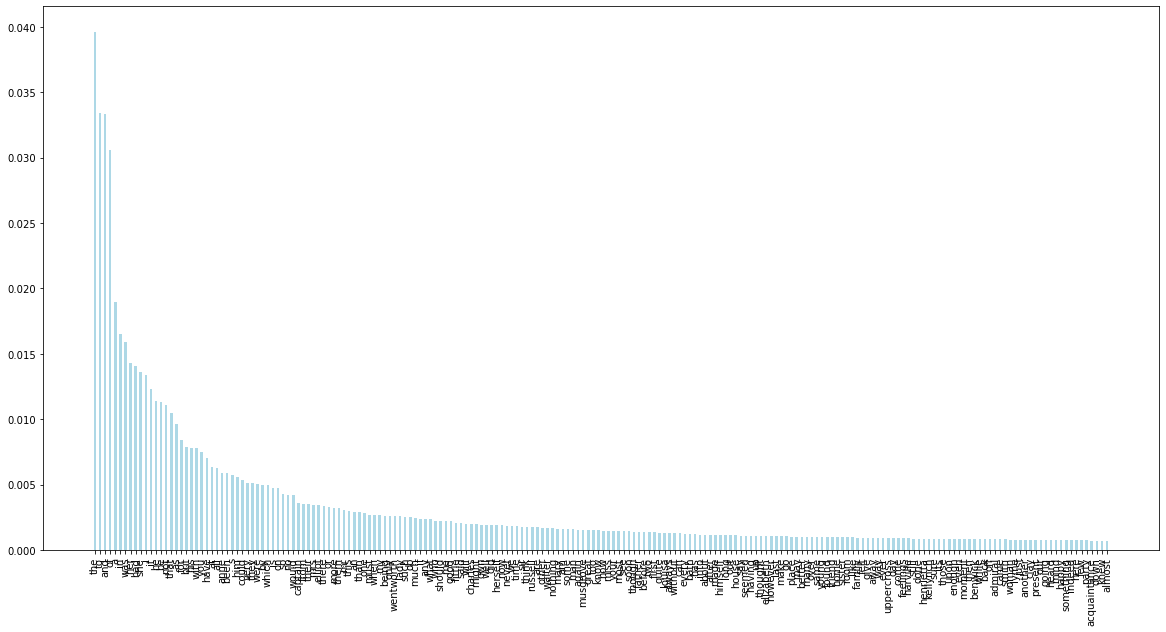

In [13]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.rc('xtick',labelsize=10)
plt.bar(relative_words_freq_dict.keys(), relative_words_freq_dict.values(), width=.5, color='lightblue')

6. Zipf's
Does the observed relative frequency of these words follow Zipf’s law? Explain.

Zipf’s Law describes one aspect of the statistical distribution in words in language: if you rank words by their frequency in a sufficiently large collection of texts and then plot the frequency against the rank, you get a logarithmic curve (or, if you graph on a log scale, you get a straight line)

Zipf's law was originally formulated in terms of quantitative linguistics , stating that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. 


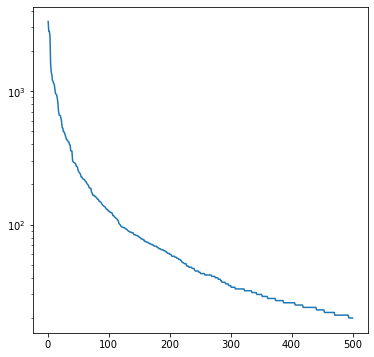

In [15]:
zwords = top_words = fdist.most_common(500)
x_vec = [i+1 for i in range(len(zwords))]
y_vec = [freq for (word,freq) in zwords]

plt.figure(1, figsize=(6,6))
plt.semilogy(x_vec, y_vec)
plt.show()

According to Zipf's Law we expect if the most common word occurs n times then the next most common word should occur $\frac{n}{2}$ times and so on. On a log scale graph this would be a straight line but from the text we are using this does not seem to be the case. It appears that the most commonly used words occur at a much higher frequency then the next and so on for the first 100 words or so. This gives us the curved graph that we see above.

Conclusion : We can see in the list above that many of the words that are used frequently in the Asten text that would not be in other English Sources of words and  that it may be specific to the story we are analyzing and so we wouldn't expect them to be as frequently used outside of that context.Use of Titles and pronouns seems to be more prominent in Jane Austen's writting.